<a href="https://colab.research.google.com/github/leotodisco/QUALITY/blob/main/2_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import library**

In [2]:
%pip install lazypredict
%pip install seaborn
%pip install matplotlib
%pip install aif360
%pip install 'aif360[Reductions]'
%pip install 'aif360[inFairness]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 32.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.

In [2]:
!git clone https://github.com/leotodisco/QUALITY.git

Cloning into 'QUALITY'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 61 (delta 20), reused 22 (delta 5), pack-reused 0
Receiving objects: 100% (61/61), 614.27 KiB | 4.52 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
%cd "/content/QUALITY"
!git pull

%cd ..
%cd ..

/content/QUALITY
Already up to date.
/content
/


## K-Fold Experiments and Models Selection

LazyPredict test (without k-fold)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

data_path = "/content/QUALITY/datasets/2-Shot/terzo_dataset_generato.csv"
df = pd.read_csv(data_path)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 11.00it/s]


[LightGBM] [Info] Number of positive: 390, number of negative: 410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.97,0.97,0.97,0.97,0.10
NuSVC,0.97,0.97,0.97,0.97,0.09
LinearSVC,0.96,0.97,0.97,0.97,0.12
CalibratedClassifierCV,0.96,0.97,0.97,0.97,0.22
BaggingClassifier,0.96,0.96,0.96,0.96,0.07
SGDClassifier,0.96,0.96,0.96,0.96,0.09
LogisticRegression,0.96,0.96,0.96,0.96,0.09
KNeighborsClassifier,0.96,0.96,0.96,0.96,0.05
LinearDiscriminantAnalysis,0.95,0.96,0.96,0.96,0.09


K-fold (k=10) cross validation, collecting Accuracy and F1-Score

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


result = pd.DataFrame(columns=["Fold","Model","Accuracy","F1-Score"], index=np.arange(270))
fold = KFold(n_splits=10, random_state=6666, shuffle=True)

counter = 0
foldcounter = 1
for train_index, test_index in fold.split(X, y):
        print("Processing Fold "+ str(foldcounter) + " ...")
        X_train, X_test, y_train, y_test = \
            X[ X.index.isin(train_index)], X[ X.index.isin(test_index)], y[train_index], y[test_index]
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train, X_test, y_train, y_test)
        for model in models[:].iterrows():
          result.loc[counter]["Fold"] = foldcounter
          result.loc[counter]["Model"] = model[0]
          result.loc[counter]["Accuracy"] = round(model[1][0],3)
          result.loc[counter]["F1-Score"] = round(model[1][3],3)
          counter += 1
          foldcounter += 1

result

Processing Fold 1 ...


100%|██████████| 29/29 [00:02<00:00, 12.53it/s]


[LightGBM] [Info] Number of positive: 452, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502222 -> initscore=0.008889
[LightGBM] [Info] Start training from score 0.008889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
P

100%|██████████| 29/29 [00:02<00:00, 12.11it/s]


[LightGBM] [Info] Number of positive: 452, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502222 -> initscore=0.008889
[LightGBM] [Info] Start training from score 0.008889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 29/29 [00:02<00:00, 12.13it/s]


[LightGBM] [Info] Number of positive: 451, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501111 -> initscore=0.004444
[LightGBM] [Info] Start training from score 0.004444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
P

100%|██████████| 29/29 [00:03<00:00,  8.34it/s]


[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

100%|██████████| 29/29 [00:02<00:00,  9.75it/s]


[LightGBM] [Info] Number of positive: 457, number of negative: 443
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507778 -> initscore=0.031114
[LightGBM] [Info] Start training from score 0.031114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 29/29 [00:02<00:00, 12.97it/s]


[LightGBM] [Info] Number of positive: 444, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:02<00:00, 11.77it/s]


[LightGBM] [Info] Number of positive: 443, number of negative: 457
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492222 -> initscore=-0.031114
[LightGBM] [Info] Start training from score -0.031114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:05<00:00,  6.13it/s]

[LightGBM] [Info] Number of positive: 447, number of negative: 453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496667 -> initscore=-0.013334
[LightGBM] [Info] Start training from score -0.013334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:05<00:00,  5.14it/s]


Processing Fold 209 ...


 97%|█████████▋| 28/29 [00:05<00:00, 10.76it/s]

[LightGBM] [Info] Number of positive: 445, number of negative: 455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494444 -> initscore=-0.022223
[LightGBM] [Info] Start training from score -0.022223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:05<00:00,  4.95it/s]


Processing Fold 235 ...


100%|██████████| 29/29 [00:05<00:00,  5.57it/s]

[LightGBM] [Info] Number of positive: 447, number of negative: 453
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496667 -> initscore=-0.013334
[LightGBM] [Info] Start training from score -0.013334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Fold,Model,Accuracy,F1-Score
0,1,AdaBoostClassifier,0.96,0.96
1,2,LGBMClassifier,0.96,0.96
2,3,LogisticRegression,0.95,0.95
3,4,KNeighborsClassifier,0.95,0.95
4,5,DecisionTreeClassifier,0.94,0.94
...,...,...,...,...
265,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN


In [ ]:
print(result.groupby('Model', as_index=False)['Accuracy'].mean().sort_values(by='Accuracy', ascending=False))

                            Model Accuracy
25                            SVC     0.96
15             LogisticRegression     0.96
17                          NuSVC     0.96
0              AdaBoostClassifier     0.96
23              RidgeClassifierCV     0.96
10                 LGBMClassifier     0.96
4          DecisionTreeClassifier     0.95
3          CalibratedClassifierCV     0.95
22                RidgeClassifier     0.95
14                      LinearSVC     0.95
24                  SGDClassifier     0.95
21         RandomForestClassifier     0.95
9            KNeighborsClassifier     0.95
13     LinearDiscriminantAnalysis     0.95
7            ExtraTreesClassifier     0.95
11               LabelPropagation     0.95
12                 LabelSpreading     0.95
6             ExtraTreeClassifier     0.95
1               BaggingClassifier     0.94
19                     Perceptron     0.94
18    PassiveAggressiveClassifier     0.92
20  QuadraticDiscriminantAnalysis     0.79
8          

In [ ]:
print(result.groupby('Model', as_index=False)['F1-Score'].mean().sort_values(by='F1-Score', ascending=False))

                            Model F1-Score
25                            SVC     0.96
15             LogisticRegression     0.96
17                          NuSVC     0.96
0              AdaBoostClassifier     0.96
23              RidgeClassifierCV     0.96
10                 LGBMClassifier     0.96
4          DecisionTreeClassifier     0.95
3          CalibratedClassifierCV     0.95
22                RidgeClassifier     0.95
14                      LinearSVC     0.95
24                  SGDClassifier     0.95
21         RandomForestClassifier     0.95
9            KNeighborsClassifier     0.95
13     LinearDiscriminantAnalysis     0.95
7            ExtraTreesClassifier     0.95
11               LabelPropagation     0.95
12                 LabelSpreading     0.95
6             ExtraTreeClassifier     0.95
1               BaggingClassifier     0.94
19                     Perceptron     0.94
18    PassiveAggressiveClassifier     0.92
20  QuadraticDiscriminantAnalysis     0.79
2          

The 5 best results are provided by:

- **SVC** (Accuracy: 0.96, F1: 0.96)
- **LogisticRegression** (Accuracy: 0.96, F1: 0.96)
- **NuSVC** (Accuracy: 0.96, F1: 0.96)
- **AdaBoostClassifier** (Accuracy: 0.96, F1: 0.96)
- **RidgeClassifierCV** (Accuracy: 0.96, F1: 0.96)

# HyperParameter Optimization

### GridSearchCV - LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

dataset = pd.read_csv(data_path)
X = dataset.drop('target',axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42) #test size 0.2 (80/20) e random state 42

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False )
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Lascia le altre colonne inalterate
)

In [ ]:
model = LogisticRegression(n_jobs=-1, random_state=0)

param_grid = {
    #'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced']
}


precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_logisticRegression = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


print("Shape di X_train:", X_train.shape)
print("Shape di X_test:", X_test.shape)


# fitting the model for grid search
grid_logisticRegression.fit(X_train, y_train)

# print best parameter after tuning
print(grid_logisticRegression.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logisticRegression.best_estimator_)

grid_logisticRegression.score(X_test, y_test)


Shape di X_train: (800, 57)
Shape di X_test: (200, 57)
Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END class_weight=None; accuracy: (test=0.887) f1: (test=0.892) precision: (test=0.881) recall: (test=0.902) total time=   1.3s
[CV 2/10] END class_weight=None; accuracy: (test=0.988) f1: (test=0.988) precision: (test=0.976) recall: (test=1.000) total time=   0.6s
[CV 3/10] END class_weight=None; accuracy: (test=0.963) f1: (test=0.963) precision: (test=0.975) recall: (test=0.951) total time=   0.1s
[CV 4/10] END class_weight=None; accuracy: (test=0.762) f1: (test=0.776) precision: (test=0.750) recall: (test=0.805) total time=   0.0s
[CV 5/10] END class_weight=None; accuracy: (test=0.963) f1: (test=0.964) precision: (test=0.952) recall: (test=0.976) total time=   0.1s
[CV 6/10] END class_weight=None; accuracy: (test=0.863) f1: (test=0.874) precision: (test=0.826) recall: (test=0.927) total time=   0.0s
[CV 7/10] END class_weight=None; accuracy: (test=0.950) f1: (t

0.95

## GridSearchCV - NuSVC

In [ ]:
from sklearn.svm import NuSVC

model = NuSVC()
# mettere qui gli stessi param del dataset originale
param_grid = {
    'nu': [0.1, 0.5, 0.9],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1],
}


precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_svc = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

# fitting the model for grid search
grid_svc.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

grid_svc.score(X_test, y_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.412) f1: (test=0.338) precision: (test=0.400) recall: (test=0.293) total time= 1.3min
[CV 2/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.575) f1: (test=0.575) precision: (test=0.590) recall: (test=0.561) total time= 1.3min
[CV 3/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.637) f1: (test=0.651) precision: (test=0.643) recall: (test=0.659) total time=  32.4s
[CV 4/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.537) f1: (test=0.575) precision: (test=0.543) recall: (test=0.610) total time=  25.7s
[CV 5/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.637) f1: (test=0.613) precision: (test=0.676) recall: (test=0.561) total time= 1.2min
[CV 6/10] END gamma=scale, kernel=linear, nu=0.1; accuracy: (test=0.512) f1: (test=0.541) precision: (test=0.523) recall: (test=0.561) total time= 1.2min
[CV 7/10] END

0.955

## AdaBoostClassifier

In [ ]:
from sklearn.svm import NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_model = AdaBoostClassifier()

# Definisci la griglia di iperparametri
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.5, 1, 1.5, 2],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)]
}

precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_ada_boost = GridSearchCV(ada_model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)


# fitting the model for grid search
grid_ada_boost.fit(X_train, y_train)

# print best parameter after tuning
print(grid_ada_boost.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ada_boost.best_estimator_)

grid_ada_boost.score(X_test, y_test)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; accuracy: (test=0.725) f1: (test=0.784) precision: (test=0.656) recall: (test=0.976) total time=   0.3s
[CV 2/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; accuracy: (test=0.700) f1: (test=0.774) precision: (test=0.631) recall: (test=1.000) total time=   0.3s
[CV 3/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; accuracy: (test=0.662) f1: (test=0.748) precision: (test=0.606) recall: (test=0.976) total time=   0.3s
[CV 4/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; accuracy: (test=0.725) f1: (test=0.780) precision: (test=0.661) recall: (test=0.951) total time=   0.3s
[CV 5/10] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; a

0.955

## GridSearchCV - RidgeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifierCV

model = RidgeClassifierCV()

param_grid = {
    'alphas': [[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0]],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'cv': [3, 5, 10]
}

precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_ridge = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)


# fitting the model for grid search
grid_ridge.fit(X_train, y_train)

# print best parameter after tuning
print(grid_ridge.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ridge.best_estimator_)

grid_ridge.score(X_test, y_test)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END alphas=[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0], class_weight=None, cv=3, fit_intercept=True; accuracy: (test=0.950) f1: (test=0.951) precision: (test=0.951) recall: (test=0.951) total time=   0.1s
[CV 2/10] END alphas=[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0], class_weight=None, cv=3, fit_intercept=True; accuracy: (test=0.988) f1: (test=0.988) precision: (test=0.976) recall: (test=1.000) total time=   0.2s
[CV 3/10] END alphas=[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0], class_weight=None, cv=3, fit_intercept=True; accuracy: (test=0.963) f1: (test=0.963) precision: (test=0.975) recall: (test=0.951) total time=   0.1s
[CV 4/10] END alphas=[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0], class_weight=None, cv=3, fit_intercept=True; accuracy: (test=0.938) f1: (test=0.940) precision: (test=0.929) recall: (test=0.951) total time=   0.1s
[CV 5/10] END alphas=[0.1, 1.0, 10.0, 100.0, 200.0, 500.0, 1000.0], c

0.95

## GridSearchCV - SVC

In [ ]:
from sklearn.svm import SVC

# Definisci il modello SVC
model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
}

precision_scorer = make_scorer(precision_score, zero_division=0)
custom_scoring = {"accuracy": "accuracy", "precision": precision_scorer, "recall": "recall", "f1": "f1"}

grid_svc = GridSearchCV(model, param_grid, refit = 'accuracy', verbose = 3, scoring=custom_scoring, cv=10)

# fitting the model for grid search
grid_svc.fit(X_train, y_train)

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)

grid_svc.score(X_test, y_test)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
[CV 1/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.938) f1: (test=0.938) precision: (test=0.950) recall: (test=0.927) total time=  15.2s
[CV 2/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.988) f1: (test=0.988) precision: (test=0.976) recall: (test=1.000) total time=  17.0s
[CV 3/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.988) f1: (test=0.988) precision: (test=0.976) recall: (test=1.000) total time=  17.7s
[CV 4/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.925) f1: (test=0.927) precision: (test=0.927) recall: (test=0.927) total time=  20.3s
[CV 5/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accuracy: (test=0.963) f1: (test=0.964) precision: (test=0.952) recall: (test=0.976) total time=  20.9s
[CV 6/10] END C=0.1, class_weight=None, gamma=scale, kernel=linear; accurac

# RQ1

1. trova miglior modello
2. traino su dataset artificiale e testo sul dataset reale
3. potrebbe avere senso fare test statistico

*Il modello migliore è AdaBoostClassifier.*

*Nella seguente cella si va a trainare AdaBoostClassifier sul dataset generato e lo si testa sul dataset reale.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

data_path = "/content/QUALITY/datasets/2-Shot/terzo_dataset_generato.csv"
dataset = pd.read_csv(data_path)
categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)


# Creiamo i nomi delle colonne per le feature trasformate
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Creiamo i nomi delle colonne per il DataFrame finale
colonne_numeriche = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
feature_names = list(ohe_feature_names) + colonne_numeriche

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), \
                                     learning_rate=1.5, n_estimators=200)

ada_boost_model.fit(X_train, y_train)
print("Shape di X_train:", X_train.shape)
print("Shape di X_test:", X_test.shape)


y_pred = ada_boost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score = {f1}")

Shape di X_train: (800, 57)
Shape di X_test: (200, 57)
Accuracy = 0.955
F1 score = 0.9508196721311475


In [ ]:
data_path = "/content/QUALITY/datasets/german_dataset.csv"

dataset_originale = pd.read_csv(data_path)

X = dataset_originale.drop('target', axis=1)
y = dataset_originale['target']

X = preprocessor.transform(X)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = ada_boost_model.predict(X)
accuracy = accuracy_score(y, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y, y_pred_original_dataset)
print(f"F1 score = {f1}")

Accuracy = 0.557
F1 score = 0.6541764246682279


# RQ0: somiglianza fra dataset originale e dataset generato sinteticamente


In [1]:
import pandas as pd

dataset_originale = pd.read_csv("/content/QUALITY/datasets/german_dataset.csv")
dataset_sintetico = pd.read_csv("/content/QUALITY/datasets/2-Shot/terzo_dataset_generato.csv")

righe_comuni = pd.merge(dataset_originale, dataset_sintetico, how='inner')

print(f"\nRighe comuni: \n{righe_comuni}\n")

num_righe_comuni = righe_comuni.shape[0]
print(f"\nNumero di righe uguali tra i due DataFrame: {num_righe_comuni}\n")

FileNotFoundError: [Errno 2] No such file or directory: '/content/QUALITY/datasets/german_dataset.csv'

In [27]:
# Controlliamo il numero di righe duplicate nel dataset

duplicate_rows = dataset_sintetico.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Numero di righe duplicate: {num_duplicates}")

Numero di righe duplicate: 282


## Plot dei dataset

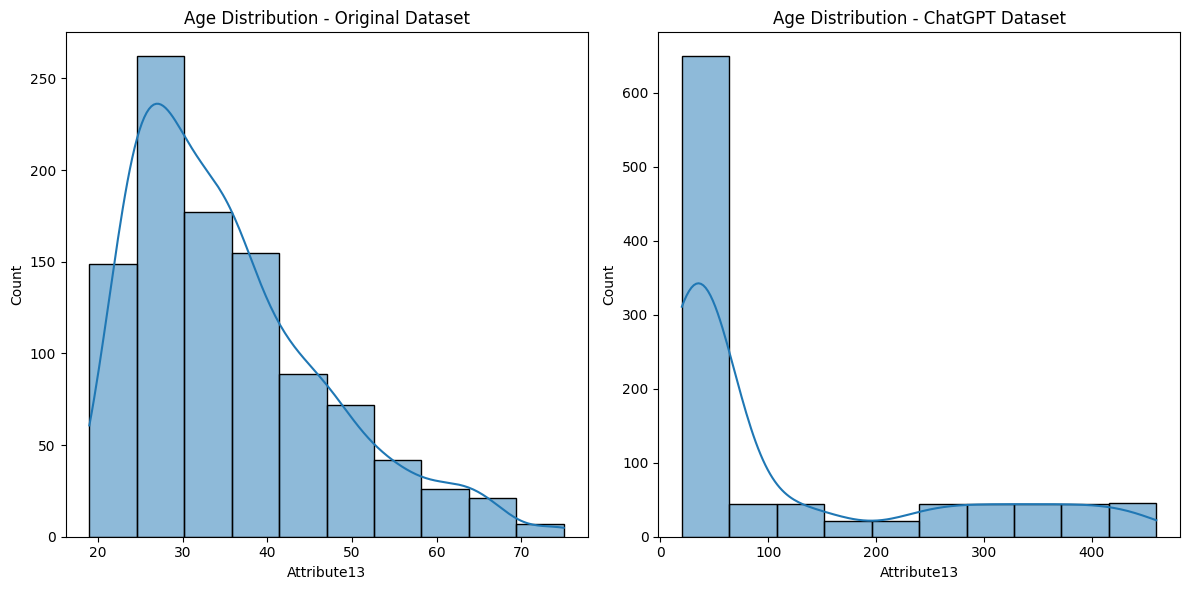

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute13'], bins=10, kde=True)
plt.title('Age Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()


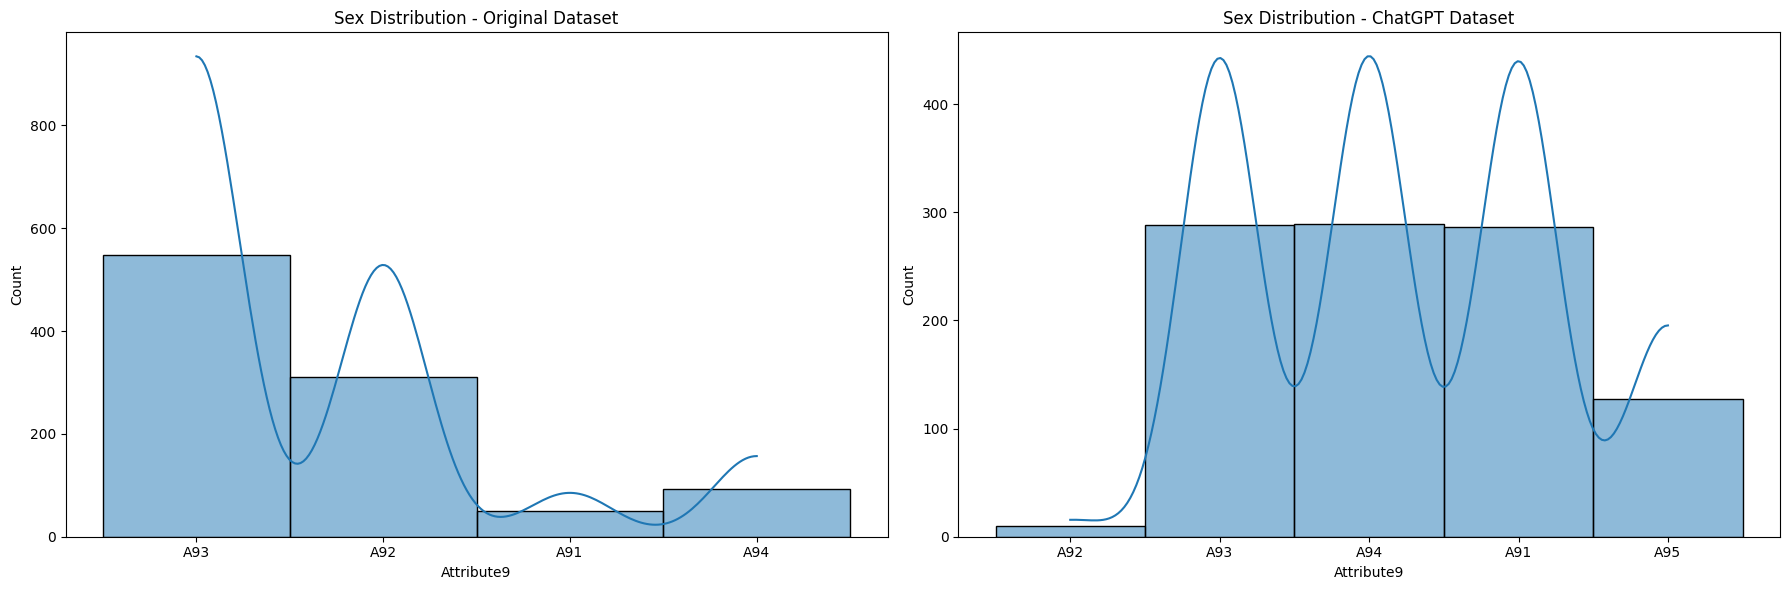

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset_originale['Attribute9'], bins=10, kde=True)
plt.title('Sex Distribution - Original Dataset')

plt.subplot(1, 2, 2)
sns.histplot(dataset_sintetico['Attribute9'], bins=10, kde=True)
plt.title('Sex Distribution - ChatGPT Dataset')

plt.tight_layout()
plt.show()

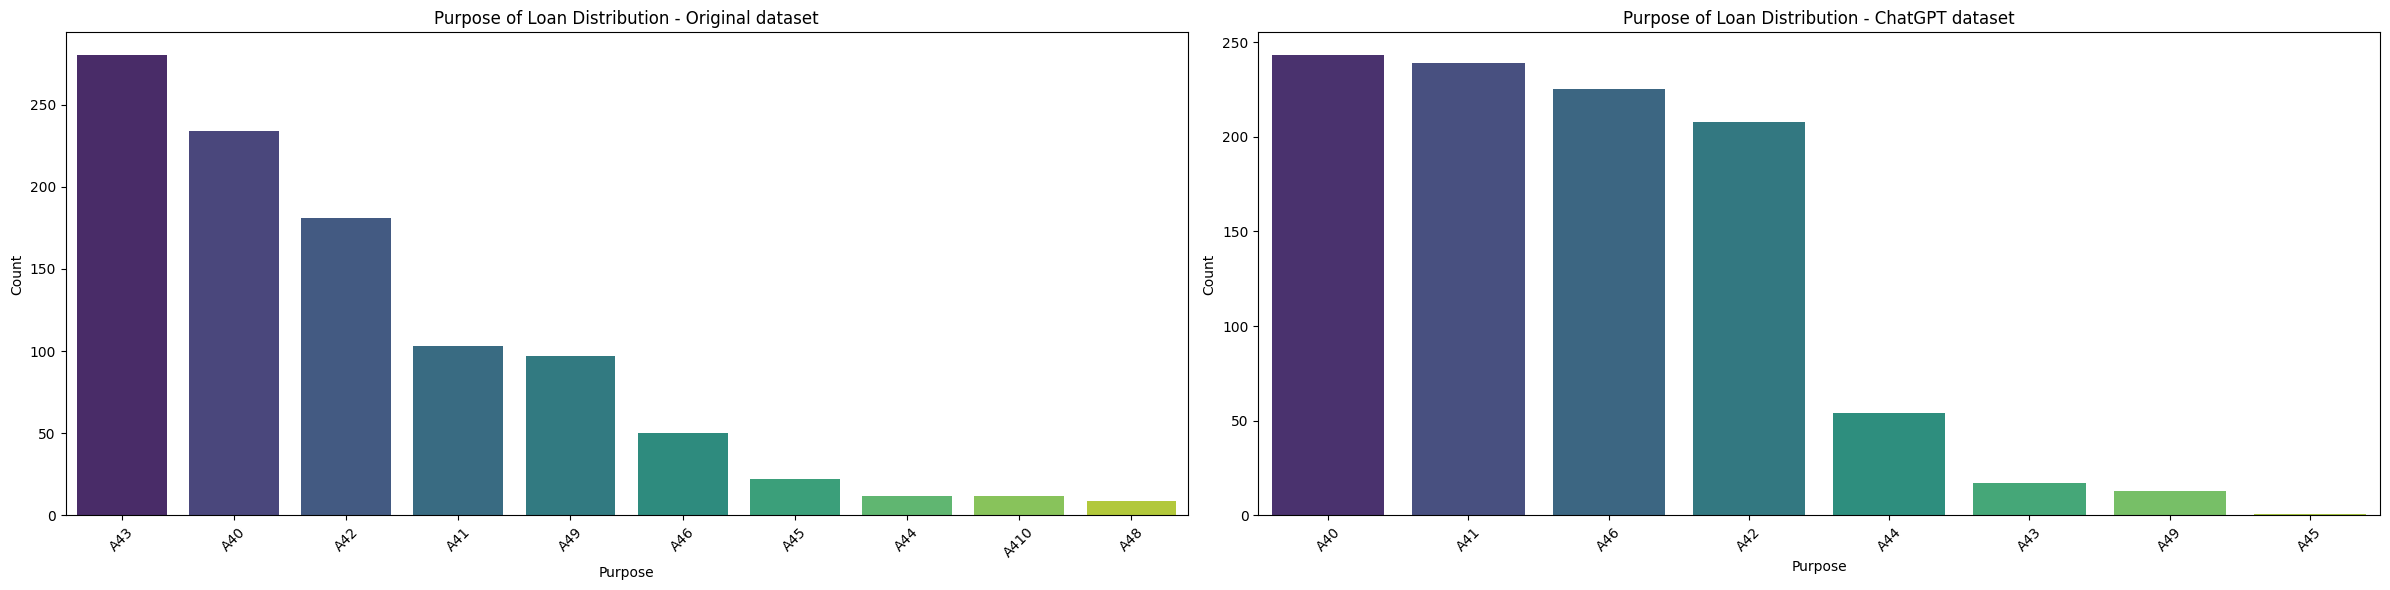

These are all the values for Purpose (Attribute4) in CHATGPT dataset: ['A40' 'A41' 'A49' 'A42' 'A43' 'A44' 'A45' 'A46']
These are all the values for Purpose (Attribute4) in the Original dataset: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']


In [30]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Attribute4', data=dataset_originale, order=dataset_originale['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - Original dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Attribute4', data=dataset_sintetico, order=dataset_sintetico['Attribute4'].value_counts().index, palette="viridis")
plt.title('Purpose of Loan Distribution - ChatGPT dataset')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"These are all the values for Purpose (Attribute4) in CHATGPT dataset: {dataset_sintetico['Attribute4'].unique()}")
print(f"These are all the values for Purpose (Attribute4) in the Original dataset: {dataset_originale['Attribute4'].unique()}")

# Proviamo a rimuovere tutti i duplicati dal dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
data_path = "/content/QUALITY/datasets/2-Shot/terzo_dataset_generato.csv"
dataset = pd.read_csv(data_path)
dataset = dataset.drop_duplicates()

X = dataset.drop('target', axis=1)
y = dataset['target']

X_train_no_dup, X_test_no_dup, y_train_no_dup, y_test_no_dup = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_no_dup = preprocessor.transform(X_train_no_dup)
X_test_no_dup = preprocessor.transform(X_test_no_dup)

print("Shape di X_train:", X_train_no_dup.shape)
print("Shape di X_test:", X_test_no_dup.shape)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), \
                                     learning_rate=1.5, n_estimators=200)

ada_boost_model.fit(X_train_no_dup, y_train_no_dup)

y_pred_no_dup = ada_boost_model.predict(X_test_no_dup)
accuracy = accuracy_score(y_test_no_dup, y_pred_no_dup)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y_test_no_dup, y_pred_no_dup)
print(f"F1 score = {f1}")

In [ ]:
data_path = "/content/QUALITY/datasets/german_dataset.csv"  # original dataset
dataset = pd.read_csv(data_path)

X = dataset.drop('target', axis=1)
y = dataset['target']

X = preprocessor.transform(X)

print("Shape di X originale:", X.shape)

In [ ]:
# Qui si vedono le performance del modello sul dataset originale
y_pred_original_dataset = ada_boost_model.predict(X)
accuracy = accuracy_score(y, y_pred_original_dataset)
print(f"Accuracy = {accuracy}")

f1 = f1_score(y, y_pred_original_dataset)
print(f"F1 score = {f1}")

# RQ2

In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.datasets import StandardDataset
from aif360.metrics import ClassificationMetric

"""
- Sex, privileged: Male, unprivileged: Female   | Attribute9
- Age, privileged: Old, unprivileged: Young     | Attribute13

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
        A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single
"""

sex_features = ['Attribute9_A91','Attribute9_A92','Attribute9_A93','Attribute9_A94','Attribute9_A95'] # attributi protetti

fairness_dataset = pd.DataFrame(X_test.copy(), columns=feature_names)
fairness_dataset['target'] = y_test.to_numpy() # and join the target feature with the others

predictions = fairness_dataset
predictions['target'] = y_pred # but this time the target feature is made by the predictions of our model

# This is the object made of the original dataset
aif_sex_dataset = BinaryLabelDataset( # Base class for all structured datasets with binary labels.
        df=fairness_dataset,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)

# We do the same thing but with the predictions dataset
aif_sex_pred = BinaryLabelDataset(
        df=predictions,
        favorable_label=2.0, # This means that a prediction is biased toward the privileged attribute if its value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=sex_features,
        privileged_protected_attributes=['Attribute9_A91', 'Attribute9_A93', 'Attribute9_A94'] # here we tell AIF that we want to check for predictions that somehow privilege the attribute "sex_Male"
)


sex_privileged_group = [{'Attribute9_A91':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A93':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        {'Attribute9_A94':1.0,
                         'Attribute9_A92':0.0,
                         'Attribute9_A95':0.0,
                         },
                        ] # The privileged group is made of males

sex_unprivileged_group = [{'Attribute9_A92':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         },
                        {'Attribute9_A95':1.0,
                         'Attribute9_A91':0.0,
                         'Attribute9_A93':0.0,
                         'Attribute9_A94':0.0,
                         }] # The unprivileged group is made of females

# We provide the ClassificationMetric object with all the information needed:
# aif_sex_dataset - The original test set
# aif_sex_pred - A dataset containing the predictions of the model
# sex_privileged_group - The privileged group
# sex_unprivileged_group - The unprivileged group
fairness_metrics = ClassificationMetric(dataset=aif_sex_dataset,
                               classified_dataset=aif_sex_pred,
                               unprivileged_groups=sex_unprivileged_group,
                               privileged_groups=sex_privileged_group)

# Values less than 0 indicate that privileged group has higher
# proportion of predicted positive outcomes than unprivileged group.
# Value higher than 0 indicates that unprivileged group has higher proportion
# of predicted positive outcomes than privileged group.
SPD = round(fairness_metrics.statistical_parity_difference(),3)

# Measures the deviation from the equality of opportunity, which means that the same
# proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.
EOD = round(fairness_metrics.equal_opportunity_difference(),3)

# Average of difference in False Positive Rate and True Positive Rate for unprivileged and privileged groups
# A value of 0 indicates equality of odds, which means that samples in both the privileged and unprivileged
# groups have the same probability of being classified positively.
AOD = round(fairness_metrics.average_odds_difference(),3)

print(f"Statistical Parity Difference (SPD): {SPD}.  The ideal value of this metric is 0") # The ideal value of this metric is 0
print(f"Equal Opportunity Difference (EOD): {EOD}. The ideal value is 0.")
print(f"Average Odds Difference (AOD): {AOD}. The ideal value of this metric is 0.")


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'y_pred' contains the model predictions
# Ensure 'df' has been defined earlier in your script

"""
- Age, privileged: Old (>= 30), unprivileged: Young (< 30) | Attribute13

Attribute 13: Continuous values for age
"""

# Create a binary column for age
df['Age_Old'] = np.where(df['Attribute13'] >= 30, 1, 0)
df['Age_Young'] = np.where(df['Attribute13'] < 30, 1, 0)

categorical_features = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

X = df.drop(['target', 'Attribute13'], axis=1)  # Drop original age column
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Leave other columns untouched
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Create column names for the transformed features
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_features = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute16', 'Attribute18', 'Age_Old', 'Age_Young']
feature_names = list(ohe_feature_names) + numeric_features

age_features = ['Age_Old', 'Age_Young']  # protected attributes for age

# Create DataFrame for fairness evaluation
fairness_dataset = pd.DataFrame(X_test.copy(), columns=feature_names)
fairness_dataset['target'] = y_test.to_numpy()  # join the target feature with the others

predictions = fairness_dataset.copy()
predictions['target'] = y_pred  # the target feature is made by the predictions of our model

# Create BinaryLabelDataset for the original dataset
aif_age_dataset = BinaryLabelDataset(
        df=fairness_dataset,
        favorable_label=2.0,  # biased towards the privileged attribute if value is 2 (True)
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=age_features,
        privileged_protected_attributes=[{'Age_Old': 1.0}]  # privileged: old
)

# Create BinaryLabelDataset for the predictions
aif_age_pred = BinaryLabelDataset(
        df=predictions,
        favorable_label=2.0,
        unfavorable_label=1.0,
        label_names=['target'],
        protected_attribute_names=age_features,
        privileged_protected_attributes=[{'Age_Old': 1.0}]  # privileged: old
)

# Define privileged and unprivileged groups
age_privileged_group = [{'Age_Old': 1.0}]
age_unprivileged_group = [{'Age_Young': 1.0}]

# Compute fairness metrics
fairness_metrics = ClassificationMetric(dataset=aif_age_dataset,
                                        classified_dataset=aif_age_pred,
                                        unprivileged_groups=age_unprivileged_group,
                                        privileged_groups=age_privileged_group)

# Values less than 0 indicate that the privileged group has a higher
# proportion of predicted positive outcomes than the unprivileged group.
# Values higher than 0 indicate that the unprivileged group has a higher
# proportion of predicted positive outcomes than the privileged group.
SPD = round(fairness_metrics.statistical_parity_difference(), 3)

# Measures the deviation from equality of opportunity, meaning that the same
# proportion of each population receives the favorable outcome. This measure must be equal to 0 to be fair.
EOD = round(fairness_metrics.equal_opportunity_difference(), 3)

# Average of the difference in False Positive Rate and True Positive Rate for unprivileged and privileged groups
# A value of 0 indicates equality of odds, meaning that samples in both the privileged and unprivileged
# groups have the same probability of being classified positively.
AOD = round(fairness_metrics.average_odds_difference(), 3)

print(f"Statistical Parity Difference (SPD): {SPD}. The ideal value of this metric is 0")  # The ideal value of this metric is 0
print(f"Equal Opportunity Difference (EOD): {EOD}. The ideal value is 0.")
print(f"Average Odds Difference (AOD): {AOD}. The ideal value of this metric is 0.")
